In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Forecast Confidence Intervals**

Time series forecast models can both make predictions and provide a confidence interval for those predictions. Confidence intervals provide an upper and lower expectation for the real observation. These can be useful for assessing the range of real possible outcomes for a prediction and for better understanding the skill of the model.

**ARIMA Forecast**

The ARIMA implementation in the Statsmodels Python library can be used to fit an ARIMA
model. It returns an ARIMAResults object. This object provides the forecast() function that
can be used to make predictions about future time steps and default to predicting the value at
the next time step after the end of the training data. Assuming we are predicting just the next
time step, the forecast() method returns three values:
- *Forecast:* The forecasted value in the units of the training time series.
- *Standard error:* The standard error for the model.
- *Confidence interval:* The 95% confidence interval for the forecast.

**Forecast Confidence Interval**

In this section, we will train an ARIMA model, use it to make a prediction, and inspect the confidence interval. First, we will split the training dataset into a training and test dataset. Almost all observations will be used for training and we will hold back the last single observation as a test dataset for which we will make a prediction.

An ARIMA(5,1,1) model is trained. This is not the optimal model for this problem, just a good model for demonstration purposes. The trained model is then used to make a prediction by calling the forecast() function.

In [2]:
# Summarize the confidence interval on an ARIMA forecast
from statsmodels.tsa.arima.model import ARIMA
series = pd.read_csv("daily-total-female-births.csv",header=0,index_col=0
                    ,parse_dates=True,squeeze=True)

# Split into train and test sets
X = series.values
X = X.astype("float32")
size = len(X) - 1
train, test = X[0:size], X[size:]
# Fit an ARIMA model
model = ARIMA(train, order=(5,1,1))
model_fit = model.fit()
# Forecast
result = model_fit.get_forecast()
# Summarize forecast and confidence intervals 
print(f"Expected: {result.predicted_mean}")
print(f"Forecast: {test[0]}")
print(f"Standard Error: {result.se_mean}")
ci = result.conf_int(0.05)
print(f"95% Confidence Interval: {ci[0,0]} to {ci[0,1]}")

Expected: [45.14927516]
Forecast: 50.0
Standard Error: [7.00862751]
95% Confidence Interval: 31.412617657212174 to 58.885932655571146


**Interpreting the Confidence Interval**

The forecast() function allows the confidence interval to be specified. The alpha argument on the forecast() function specifies the confidence level. It is set by default to alpha=0.05, which is a 95% confidence interval. This is a sensible and widely used confidence interval. An alpha of 0.05 means that the ARIMA model will estimate the upper and lower values around the forecast where there is a only a 5% chance that the real value will not be in that range. 

Put another way, the 95% confidence interval suggests that there is a high likelihood that the real observation will be within the range. In the above example, the forecast was 45.878. The 95% confidence interval suggested that the real observation was highly likely to fall within the range of values between 32.167 and 59.590. The real observation was 50.0 and was well within this range. We can tighten the range of likely values a few ways:
- We can ask for a range that is narrower but increases the statistical likelihood of a real observation falling outside of the range.
- We can develop a model that has more predictive power and in turn makes more accurate predictions.

Further, the confidence interval is also limited by the assumptions made by the model, such as the distribution of errors made by the model fit a Gaussian distribution with a zero mean value (e.g. white noise). Extending the example above, we can report our forecast with a few different commonly used confidence intervals of 80%, 90%, 95% and 99%.

In [3]:
# summarize multiple confidence intervals on an ARIMA forecast
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
# load data
series = read_csv('daily-total-female-births.csv', header=0, index_col=0, 
					parse_dates=True, squeeze=True)
# split data into train and test setes
X = series.values
X = X.astype('float32')
size = len(X) - 1
train, test = X[0:size], X[size:]
# fit an ARIMA model
model = ARIMA(train, order=(5,1,1))
model_fit = model.fit()
result = model_fit.get_forecast()
forecast = result.predicted_mean
# summarize confidence intervals
intervals = [0.2, 0.1, 0.05, 0.01]
for a in intervals:
	ci = result.conf_int(alpha=a)
	print(f'{(1-a)*100} Confidence Interval: {forecast} between {ci[0,0]} and {ci[0,1]}')


80.0 Confidence Interval: [45.14927516] between 36.16735759959806 and 54.13119271318526
90.0 Confidence Interval: [45.14927516] between 33.62110877785596 and 56.67744153492736
95.0 Confidence Interval: [45.14927516] between 31.412617657212174 and 58.885932655571146
99.0 Confidence Interval: [45.14927516] between 27.096247040416007 and 63.20230327236732


**Plotting the Confidence Interval**

The confidence interval can be plotted directly. The ARIMAResults object provides the plot predict() function that can be used to make a forecast and plot the results showing recent observations, the forecast, and confidence interval. As with the forecast() function, the confidence interval can be configured by specifying the alpha argument. The default is 0.05 (95% confidence), which is a sensible default.

Text(0.5, 1.0, 'Line plot Forecast (blue) with a 95% confidence interval (gray)')

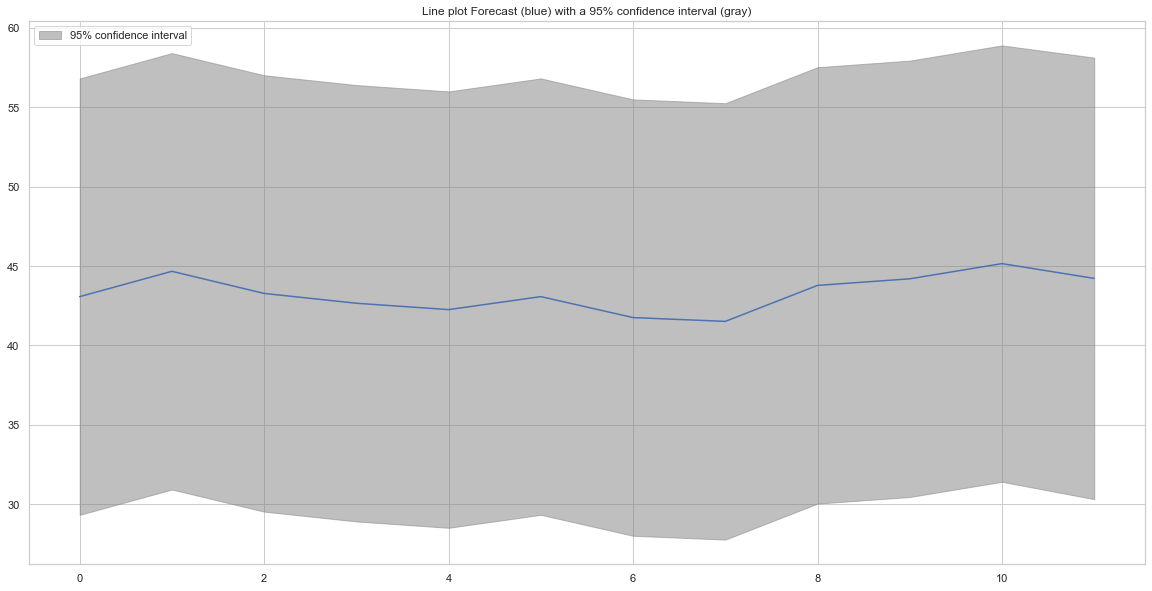

In [18]:
# https://www.statsmodels.org/stable/examples/notebooks/generated/tsa_arma_1.html?highlight=plot_predict
# plot the confidence intervals for an ARIMA forecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from statsmodels.graphics.tsaplots import plot_predict
# load data
series = read_csv('daily-total-female-births.csv', header=0, 
                index_col=0, parse_dates=True,squeeze=True)

# split into train and test sets
X = series.values
X = X.astype('float32')
size = len(X) - 1
train, test = X[0:size], X[size:]
# fit an ARIMA model
model = ARIMA(train, order=(5,1,1))
model_fit = model.fit()
# plot some history and the forecast with confidence intervals
fig,ax = plt.subplots(figsize=(20,10))
sns.set_theme(style="whitegrid")
sns.lineplot(data=test,ax=ax, color='red')
plot_predict(model_fit,start=len(train)-10, end=len(train)+1,ax=ax)
plt.legend(loc='upper left')
ax.set_title("Line plot Forecast (blue) with a 95% confidence interval (gray)")

The plot predict() function will plot the observed y values if the prediction interval covers the training data. In this case, we predict the previous 10 days and the next 1 day. This is useful to see the prediction carry on from in sample to out-of-sample time indexes. This is contracted with the actual observations from the last 10 days. Finally, we can see the confidence interval as a gray cone around the predicted value. This is useful to get a spatial feeling for the range of possible values that an observation in the next time step may take.